<a href="https://colab.research.google.com/github/theFishy-1/OCR/blob/OCR/OCR_METRICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR Metrics - CER and WER (Example Notebook)

Example notebook for Medium article - Evaluating OCR Output with CER and WER

*Highly recommended to run this notebook in Google Colab!*

Link to article: https://towardsdatascience.com/evaluating-ocr-output-quality-with-character-error-rate-cer-and-word-error-rate-wer-853175297510       
Link to GitHub repo: https://github.com/kennethleungty/OCR-Metrics-CER-WER

Author: **Kenneth Leung**

___
### 1. Install and import necessary libraries

In [1]:
!pip install pybind11
!pip install fastwer
!pip install pytesseract
!sudo apt install tesseract-ocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastwer: filename=fastwer-0.1.3-cp311-cp311-linux_x86_64.whl size=866381 sha256=e5bfce9553e574a0da9595596f803bafbf367d744f17911c2d64849d62ecb300
  Stored in directory: /root/.cache/pip/wheels/4c/53/1e/8d806da8c1ed1de60e371005658af32b92aad9426b37208f1f
Successfully built fastwer
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 htt

In [2]:
import cv2
import pytesseract
import fastwer
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display
from IPython import get_ipython

___
### 2. Simple example of CER calculation

In [3]:
# Define reference text and output text
ref = 'my name is kenneth'
output = 'myy nime iz kenneth'

# Obtain Sentence-Level Character Error Rate (CER)
fastwer.score_sent(output, ref, char_level=True)

16.6667

In [4]:
# Obtain Sentence-Level Word Error Rate (WER)
fastwer.score_sent(output, ref)

75.0

___
### 3. Run TesseractOCR to extract OCR transcribed output

In [6]:
# Show the sample images that we will work on (Need to create a folder to upload sample images in Colab environment)
img_list = os.listdir('./sample_images')
img_list = sorted([img for img in img_list if img.endswith(('.png', '.jpg', '.jpeg')) and img != '.ipynb_checkpoints'])
img_list

['image.png']

Display sample image 1 - image.png


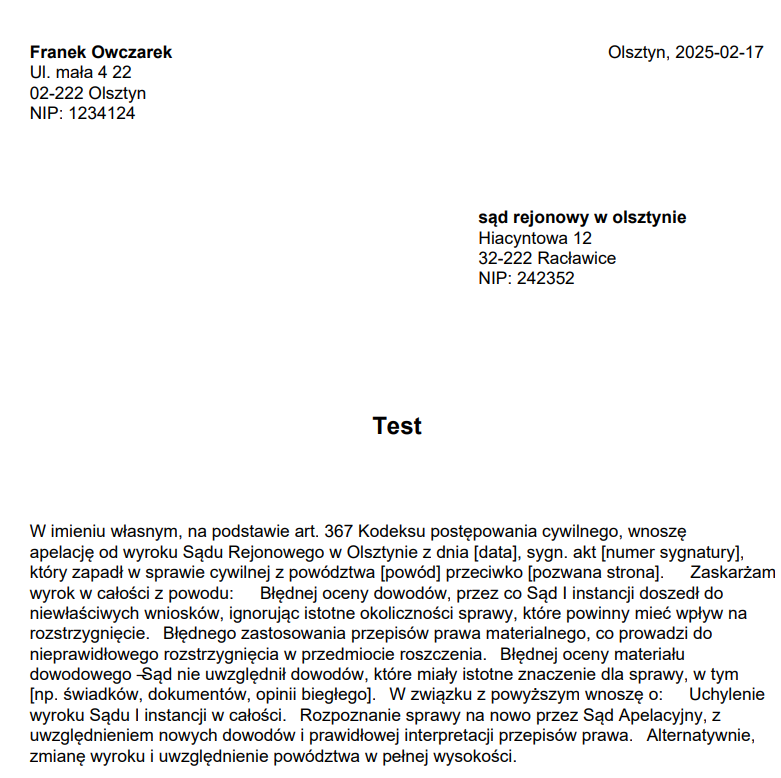

In [7]:
for i, img in enumerate(img_list):
  print(f'Display sample image {i+1} - {img}')
  display(Image(filename=f'./sample_images/{img}'))

In [8]:
# Create empty dataframe to store output
df_output = pd.DataFrame(columns = ['img_filename', 'ocr_output'])

In [11]:
# Loop through sample images
custom_config = r'--oem 3 --psm 6 -l pol  '

for img in img_list:
  im = cv2.imread(f'./sample_images/{img}')
  img_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  output = pytesseract.image_to_string(img_rgb, config=custom_config)
  print(output)
  dictionary = {'img_filename':img, 'ocr_output':str(output)}
  # Use pd.concat to append the new row
  df_output = pd.concat([df_output, pd.DataFrame([dictionary])], ignore_index=True)

Franek Owczarek Olsztyn, 2025-02-17
Ul. mała 4 22
02-222 Olsztyn
NIP: 1234124

sąd rejonowy w olsztynie

Hiacyntowa 12

32-222 Racławice

NIP: 242352

Test

W imieniu własnym, na podstawie art. 367 Kodeksu postępowania cywilnego, wnoszę
apelację od wyroku Sądu Rejonowego w Olsztynie z dnia [data], sygn. akt [numer sygnatury],
który zapadł w sprawie cywilnej z powództwa [powód] przeciwko [pozwana strona]. Zaskarżam
wyrok w całości z powodu:  Błędnej oceny dowodów, przez co Sąd I instancji doszedł do
niewłaściwych wniosków, ignorując istotne okoliczności sprawy, które powinny mieć wpływ na
rozstrzygnięcie. Błędnego zastosowania przepisów prawa materialnego, co prowadzi do
nieprawidłowego rozstrzygnięcia w przedmiocie roszczenia. Błędnej oceny materiału
dowodowego -Sąd nie uwzględnił dowodów, które miały istotne znaczenie dla sprawy, w tym
[np. świadków, dokumentów, opinii biegłego]. W związku z powyższym wnoszę o: Uchylenie
wyroku Sądu | instancji w całości. Rozpoznanie sprawy na nowo pr

___
### 4. Manually label ground truth

In [12]:
# Create new columns for reference, CER and WER
df_output['ref_text'] = ''
df_output['cer'] = ''
df_output['wer'] = ''

# Replace new lines in output
df_output['ocr_output'] = df_output['ocr_output'].apply(lambda x: x.replace('\n',''))

df_output.loc[df_output['img_filename'] == 'image.png', 'ref_text'] = "Franek Owczarek Ul. mała 4 22 02-222 Olsztyn NIP: 1234124 Olsztyn, 2025-02-17 sąd rejonowy w olsztynie Hiacyntowa 12 32-222 Racławice NIP: 242352 Test W imieniu własnym, na podstawie art. 367 Kodeksu postępowania cywilnego, wnoszę apelację od wyroku Sądu Rejonowego w Olsztynie z dnia [data], sygn. akt [numer sygnatury], który zapadł w sprawie cywilnej z powództwa [powód] przeciwko [pozwana strona]. Zaskarżam wyrok w całości z powodu: Błędnej oceny dowodów, przez co Sąd I instancji doszedł do niewłaściwych wniosków, ignorując istotne okoliczności sprawy, które powinny mieć wpływ na rozstrzygnięcie. Błędnego zastosowania przepisów prawa materialnego, co prowadzi do nieprawidłowego rozstrzygnięcia w przedmiocie roszczenia. Błędnej oceny materiału dowodowego – Sąd nie uwzględnił dowodów, które miały istotne znaczenie dla sprawy, w tym [np. świadków, dokumentów, opinii biegłego]. W związku z powyższym wnoszę o: Uchylenie wyroku Sądu I instancji w całości. Rozpoznanie sprawy na nowo przez Sąd Apelacyjny, z uwzględnieniem nowych dowodów i prawidłowej interpretacji przepisów prawa. Alternatywnie, zmianę wyroku i uwzględnienie powództwa w pełnej wysokości. franek Owczarek"

In [13]:
df_output

,img_filename,ocr_output,ref_text,cer,wer
0,image.png,"Franek Owczarek Olsztyn, 2025-02-17Ul. mała 4 ...",Franek Owczarek Ul. mała 4 22 02-222 Olsztyn N...,,


___
## 5. Calculate CER and WER

In [14]:
for index, row in df_output.iterrows():
  filename = row['img_filename']
  ref = row['ref_text']
  output = row['ocr_output']
  cer = fastwer.score_sent(output, ref, char_level=True)
  wer = fastwer.score_sent(output, ref, char_level=False)
  df_output.loc[df_output['img_filename'] == filename, 'cer'] = round(cer,2) # Round value to 2 decimal places
  df_output.loc[df_output['img_filename'] == filename, 'wer'] = round(wer,2)

df_output

,img_filename,ocr_output,ref_text,cer,wer
0,image.png,"Franek Owczarek Olsztyn, 2025-02-17Ul. mała 4 ...",Franek Owczarek Ul. mała 4 22 02-222 Olsztyn N...,6.42,29.63


In [15]:
# Overall performances
mean_cer = df_output['cer'].mean()
mean_wer = df_output['wer'].mean()
print(f'Mean CER = {mean_cer}%, Mean WER = {mean_wer}%')

Mean CER = 6.42%, Mean WER = 29.63%
